# "Análisis de Datos del Brote de Sarampión 2025: Factores de Riesgo, Mortalidad y Epicentro"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("base_sarampion_confirmados.csv")

df['FECHA_ACTUALIZACION'] = pd.to_datetime(df['FECHA_ACTUALIZACION'])

### 1. Introducción: Vigilancia Epidemiológica de Sarampión
Contexto del Estudio

El sarampión es una enfermedad viral altamente contagiosa que afecta principalmente a niños y se transmite por gotas procedentes de la nariz, boca y faringe. A pesar de la disponibilidad de una vacuna segura y eficaz, sigue siendo una de las principales causas de muerte en niños pequeños a nivel mundial.

Este estudio se enfoca en analizar la base de datos consolidada de casos sospechosos que resultaron en un Diagnóstico Positivo (Categoría 1).

#### Descripción del Dataset

La base de datos analizada es el resultado de la concatenación de registros semanales desde finales de 2020 hasta inicios de 2026. Tras el proceso de limpieza y filtrado, el universo de estudio consiste en:

- Total de casos confirmados: 109,458 registros.

- Periodo de tiempo: Noviembre 2020 - Enero 2026.

- Variables principales: Edad, Sexo, Estado Vacunal, Entidad de Residencia y Fecha de Actualización.

### 2. Análisis Temporal

In [9]:
resumen_mensual = df.resample('MS', on='FECHA_ACTUALIZACION').size().reset_index()
resumen_mensual.columns = ['Fecha', 'Casos']
resumen_mensual['Año'] = resumen_mensual['Fecha'].dt.year
resumen_mensual['Mes'] = resumen_mensual['Fecha'].dt.month

print("Resumen de los primeros meses del estudio:")
resumen_mensual

Resumen de los primeros meses del estudio:


,Fecha,Casos,Año,Mes
0,2020-11-01,196,2020,11
1,2020-12-01,1176,2020,12
2,2021-01-01,0,2021,1
3,2021-02-01,0,2021,2
4,2021-03-01,0,2021,3
...,...,...,...,...
58,2025-09-01,18022,2025,9
59,2025-10-01,24609,2025,10
60,2025-11-01,15875,2025,11
61,2025-12-01,0,2025,12


/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/2733204046.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


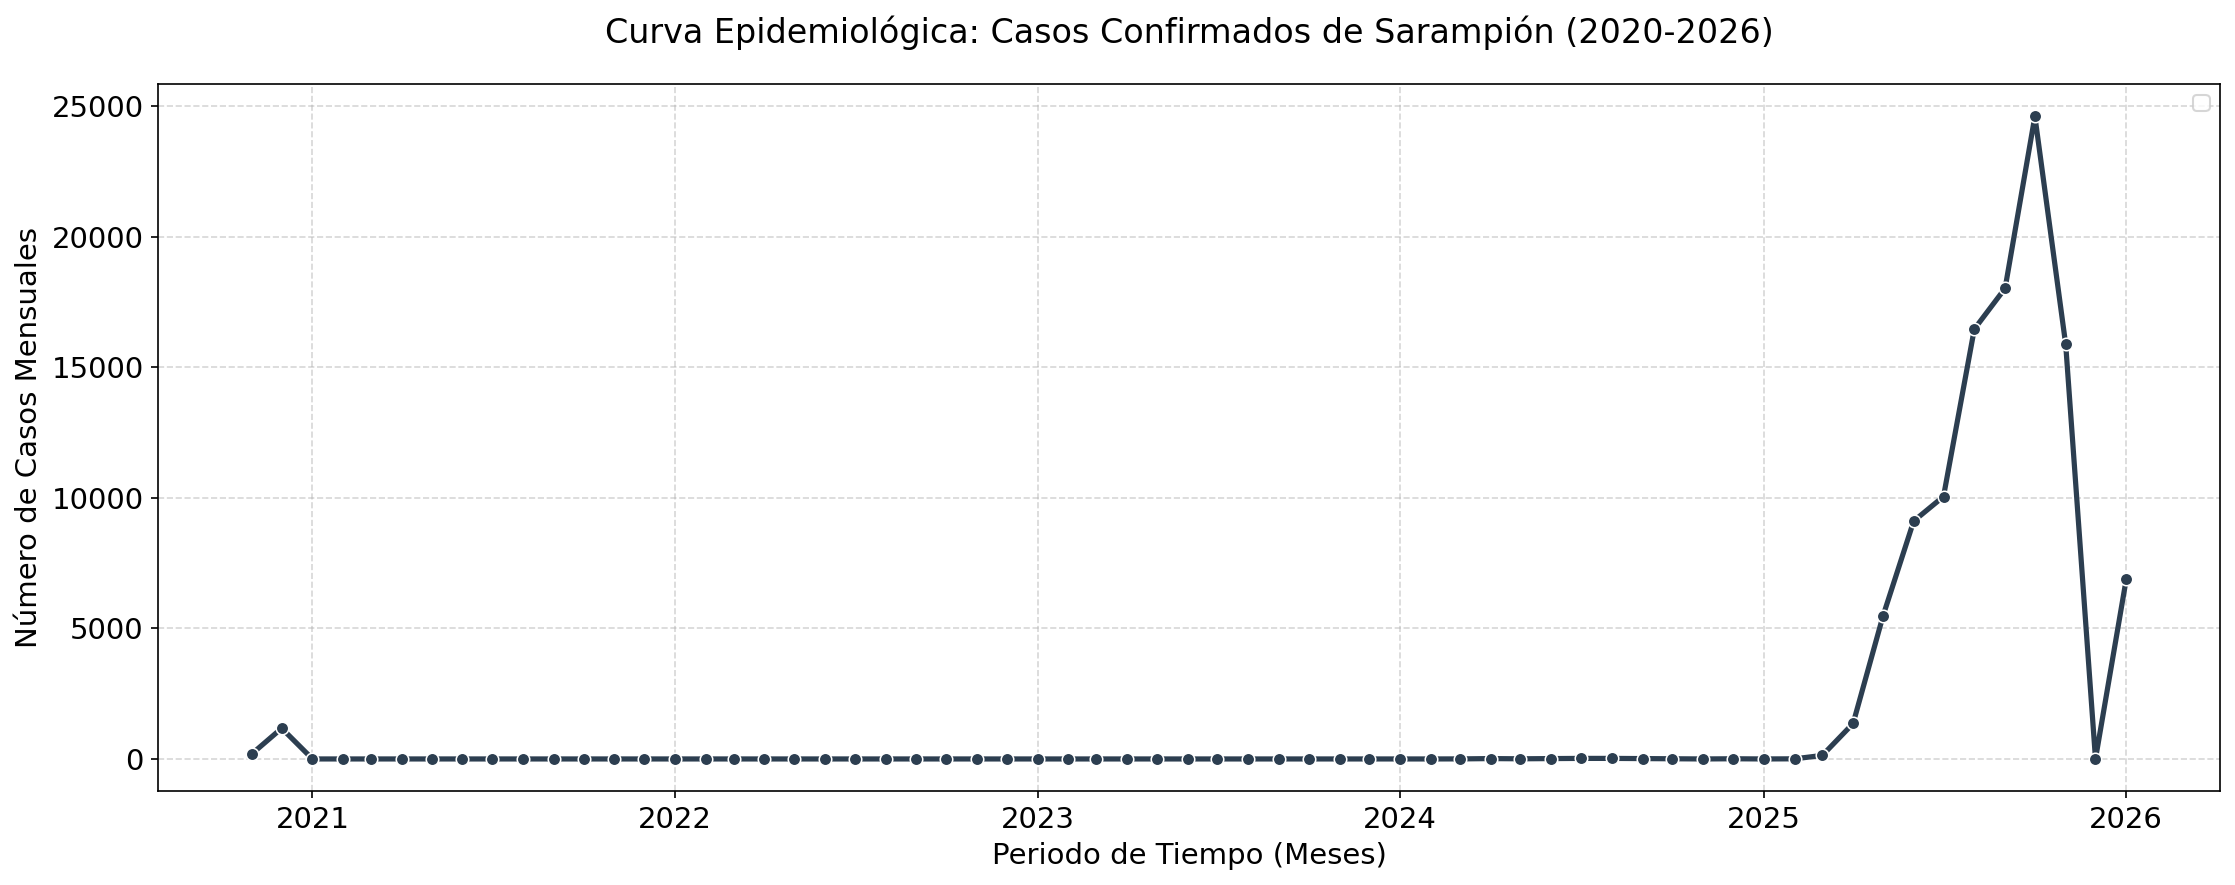

In [14]:
plt.figure(figsize=(15, 6),dpi=150)
sns.lineplot(data=resumen_mensual, x='Fecha', y='Casos', marker='o', color='#2c3e50', linewidth=2.5)

plt.title('Curva Epidemiológica: Casos Confirmados de Sarampión (2020-2026)', fontsize=16, pad=20)
plt.xlabel('Periodo de Tiempo (Meses)', fontsize=14)
plt.ylabel('Número de Casos Mensuales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tick_params(labelsize=14)

#resumen_mensual['Media_Movil'] = resumen_mensual['Casos'].rolling(window=3).mean()
#plt.plot(resumen_mensual['Fecha'], resumen_mensual['Media_Movil'], color='#e74c3c', linestyle='--', label='Tendencia (Media Móvil 3 meses)')

plt.legend()
plt.tight_layout()
plt.show()

Se identifican tres fases críticas en el comportamiento del sarampión:

- Periodo de Silencio (2021 - inicios 2025): Durante más de cuatro años, los casos confirmados se mantuvieron en niveles cercanos a cero. Esto sugiere un control efectivo o una baja circulación del virus en ese periodo.

- Brote Explosivo (Mediados 2025): Se observa un incremento exponencial que comienza aproximadamente en marzo de 2025. La curva alcanza su pico máximo a finales de 2025, llegando a registrar casi 25,000 casos en un solo mes.

- Tendencia Actual (Enero 2026): El reporte más reciente muestra una caída drástica seguida de un nuevo repunte al iniciar 2026, lo que indica que el brote aún está activo y en evolución.

/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/3110441563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=resumen_mensual, x='Mes', y='Casos', palette='viridis')


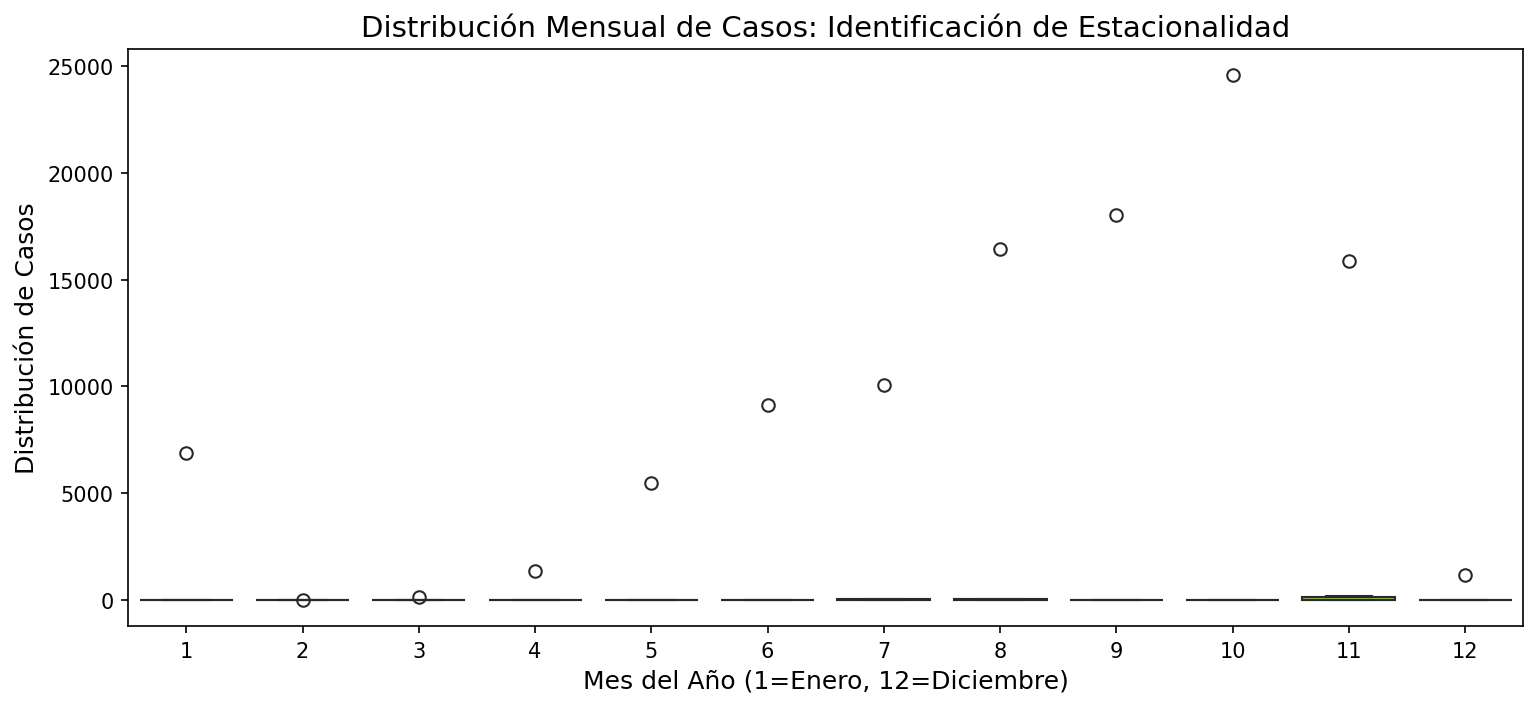

In [46]:
plt.figure(figsize=(12, 5),dpi=150)
sns.boxplot(data=resumen_mensual, x='Mes', y='Casos', palette='viridis')

plt.title('Distribución Mensual de Casos: Identificación de Estacionalidad', fontsize=14)
plt.xlabel('Mes del Año (1=Enero, 12=Diciembre)', fontsize=12)
plt.ylabel('Distribución de Casos', fontsize=12)
#plt.ylim(0, 200)
plt.show()

/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/603327268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comparativa, x='Año', y='Casos', palette='Set2')


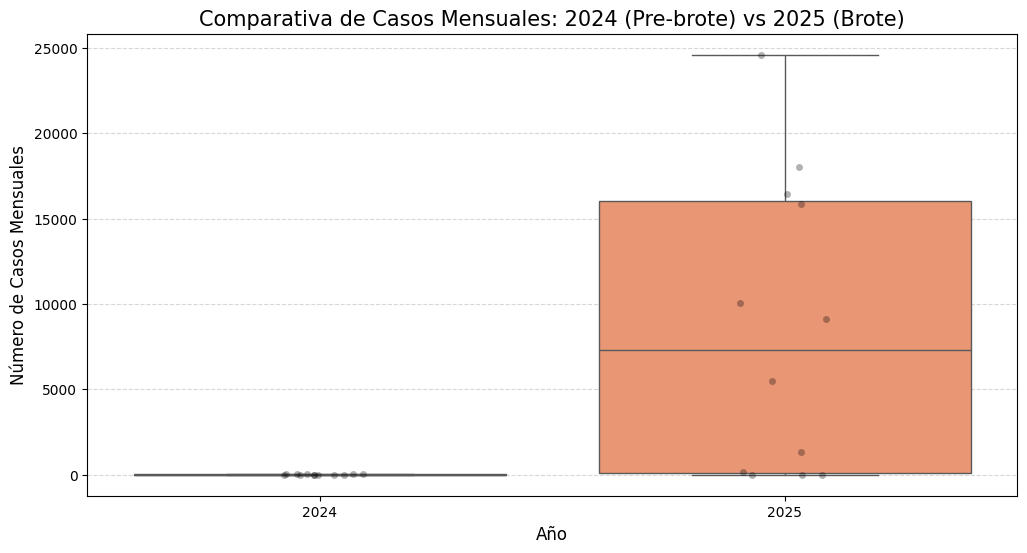

In [47]:
df_comparativa = resumen_mensual[resumen_mensual['Año'].isin([2024, 2025])]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_comparativa, x='Año', y='Casos', palette='Set2')

sns.stripplot(data=df_comparativa, x='Año', y='Casos', color='black', alpha=0.3)

plt.title('Comparativa de Casos Mensuales: 2024 (Pre-brote) vs 2025 (Brote)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Casos Mensuales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

Análisis de Estacionalidad: La gráfica de cajas (boxplot) confirma que el fenómeno actual ha roto cualquier patrón estacional histórico. Los valores atípicos (outliers) en los meses de agosto a noviembre corresponden al brote masivo de 2025, concentrando la mayor carga de la enfermedad en el segundo semestre del año.

Este hallazgo cambia el enfoque: ya no es solo un estudio descriptivo general, sino un análisis de un brote epidémico activo.

### 3. Análisis Demográfico

En esta sección exploramos las características de edad y sexo de los 109,458 casos confirmados. Esto nos permitirá identificar si el brote actual tiene un perfil pediátrico o si afecta a adultos jóvenes, lo cual sugeriría brechas en la inmunización histórica.

In [16]:
bins = [0, 1, 5, 12, 18, 30, 50, 100]
labels = ['<1 año', '1-5 años', '6-12 años', '13-18 años', '19-30 años', '31-50 años', '>50 años']

df['GRUPO_EDAD'] = pd.cut(df['EDAD_ANOS'], bins=bins, labels=labels, right=False)

dist_edad = df['GRUPO_EDAD'].value_counts(normalize=True).sort_index() * 100

print("Distribución porcentual por grupo de edad:")
print(dist_edad)

Distribución porcentual por grupo de edad:
GRUPO_EDAD
<1 año         9.813810
1-5 años      13.723985
6-12 años     12.102359
13-18 años     9.085677
19-30 años    27.161103
31-50 años    25.549526
>50 años       2.563540
Name: proportion, dtype: float64


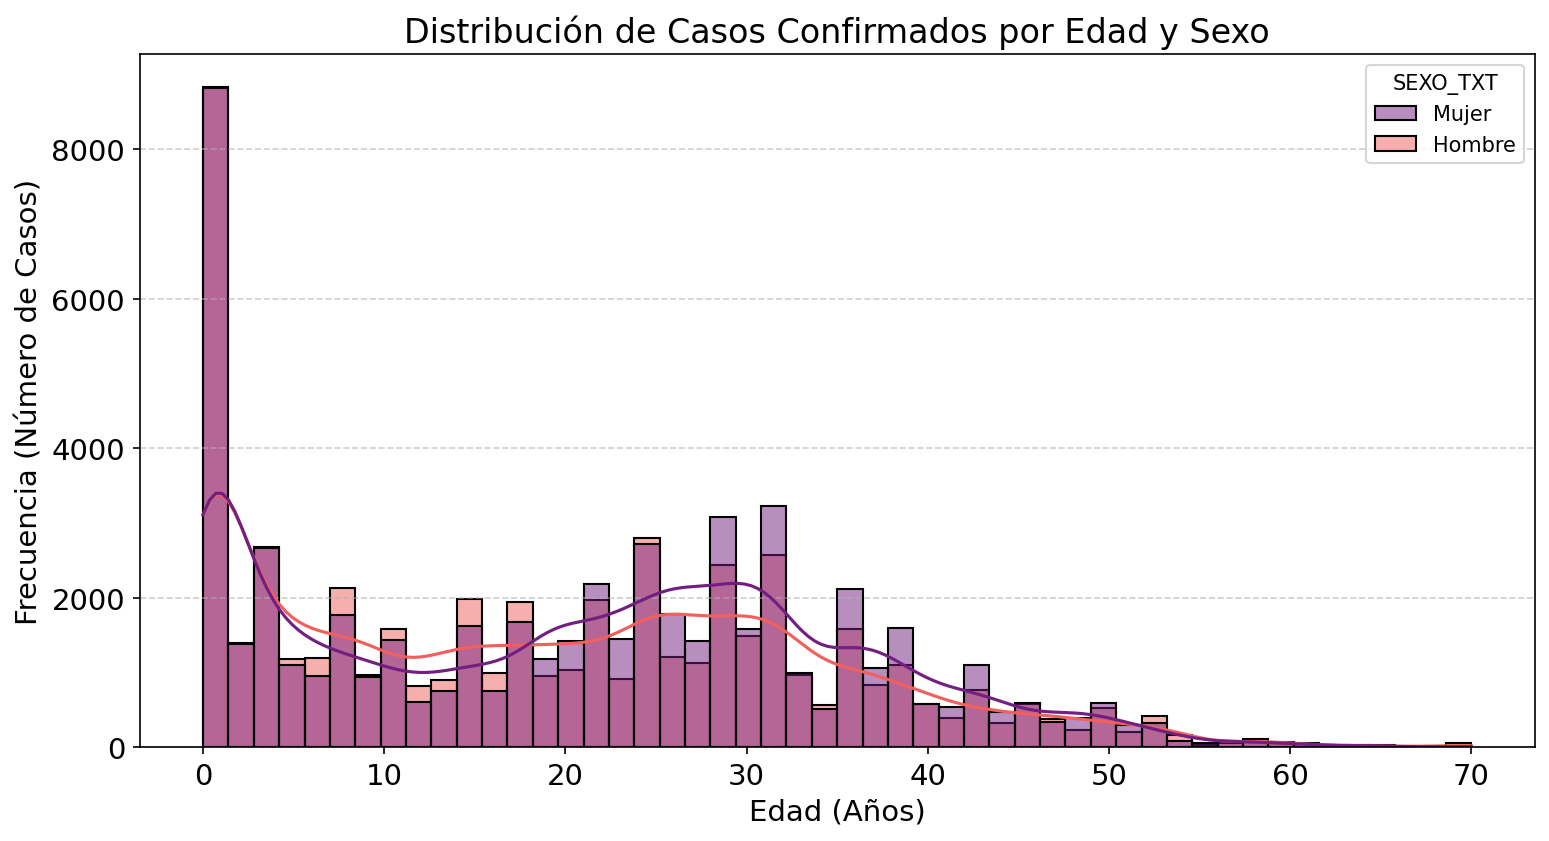

In [20]:
plt.figure(figsize=(12, 6),dpi=150)

df['SEXO_TXT'] = df['SEXO'].map({1: 'Mujer', 2: 'Hombre'})

sns.histplot(data=df, x='EDAD_ANOS', hue='SEXO_TXT', bins=50, kde=True, palette='magma')

plt.title('Distribución de Casos Confirmados por Edad y Sexo', fontsize=16)
plt.xlabel('Edad (Años)', fontsize=14)
plt.ylabel('Frecuencia (Número de Casos)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tick_params(labelsize=14)
plt.show()

/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/657699718.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  letalidad = df.groupby('GRUPO_EDAD')['DEFUNCION'].apply(lambda x: (x == 1).sum()).reset_index()
/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/657699718.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=letalidad, x='Grupo de Edad', y='Defunciones', palette='Reds_r')


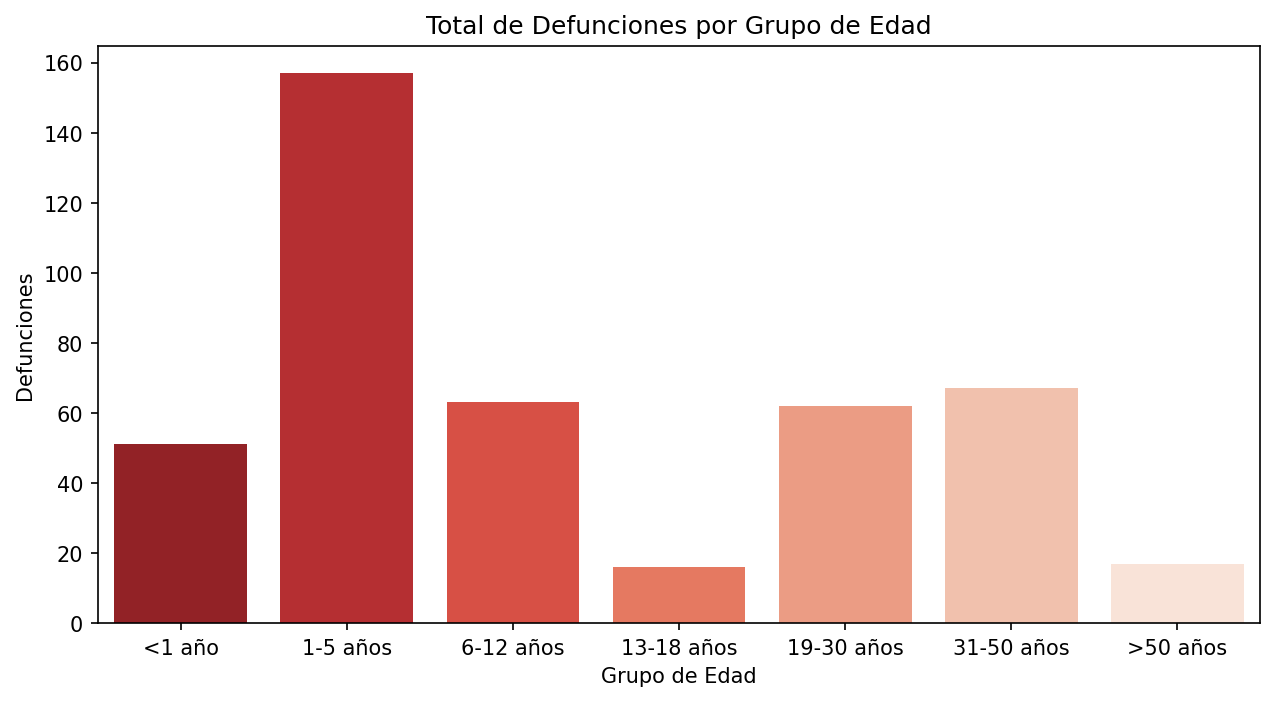

In [22]:
# Tasa de defunción por grupo de edad
letalidad = df.groupby('GRUPO_EDAD')['DEFUNCION'].apply(lambda x: (x == 1).sum()).reset_index()
letalidad.columns = ['Grupo de Edad', 'Defunciones']

plt.figure(figsize=(10, 5),dpi=150)
sns.barplot(data=letalidad, x='Grupo de Edad', y='Defunciones', palette='Reds_r')
plt.title('Total de Defunciones por Grupo de Edad', fontsize=12)
plt.show()

Tras analizar la distribución de los 109,458 casos, se identifican patrones que contrastan el comportamiento clásico de la enfermedad con la dinámica del brote actual:

- Vulnerabilidad Infantil Extrema: El histograma muestra un pico masivo en el año 0 (menores de 1 año), con más de 8,000 casos registrados. Esto es sumamente crítico, ya que los lactantes dependen de la inmunidad materna y aún no entran en el esquema regular de vacunación (SRP).

- Desplazamiento a Población Adulta: Sorprendentemente, se observa un segundo pico importante entre los 25 y 35 años. Esto sugiere una "brecha de inmunidad" en adultos jóvenes que probablemente no recibieron refuerzos o cuya inmunidad ha declinado, convirtiéndolos en un motor de transmisión durante el brote de 2025.

- Mortalidad y Gravedad: La gráfica de defunciones es contundente: el grupo de 1 a 5 años presenta la mayor letalidad, con casi 160 defunciones acumuladas. Aunque hay muchos casos en menores de 1 año, la mortalidad se dispara en la etapa preescolar. También destaca un repunte de fallecimientos en adultos de 31 a 50 años.

- Equidad de Género: La distribución por sexo es bastante simétrica, aunque se observa una ligera prevalencia de casos en mujeres en el rango de los 30 años.

### 4. Análisis de Vacunación

En esta sección, evaluamos si los casos confirmados contaban con antecedente de vacunación.

In [24]:
mapping_vacuna = {1: 'Vacunado', 2: 'No Vacunado', 9: 'Ignorado'}
df['VACUNACION_TXT'] = df['VACUNACION'].map(mapping_vacuna).fillna('Sin Dato')

resumen_vac = df['VACUNACION_TXT'].value_counts(normalize=True) * 100
print("Estado de vacunación global en casos confirmados:")
print(resumen_vac)

Estado de vacunación global en casos confirmados:
VACUNACION_TXT
No Vacunado    86.05858
Vacunado       13.94142
Name: proportion, dtype: float64


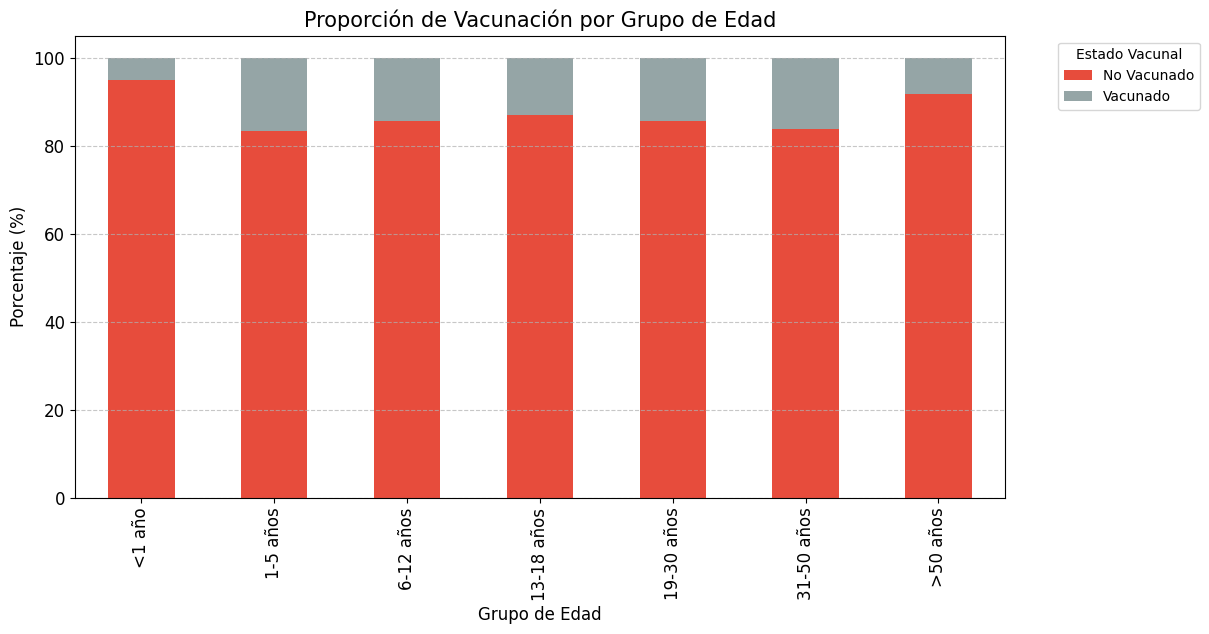

In [30]:
tabla_vac_edad = pd.crosstab(df['GRUPO_EDAD'], df['VACUNACION_TXT'], normalize='index') * 100

tabla_vac_edad.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#e74c3c', '#95a5a6', '#2ecc71', '#3498db'])

plt.title('Proporción de Vacunación por Grupo de Edad', fontsize=15)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Estado Vacunal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(labelsize=12)
plt.show()

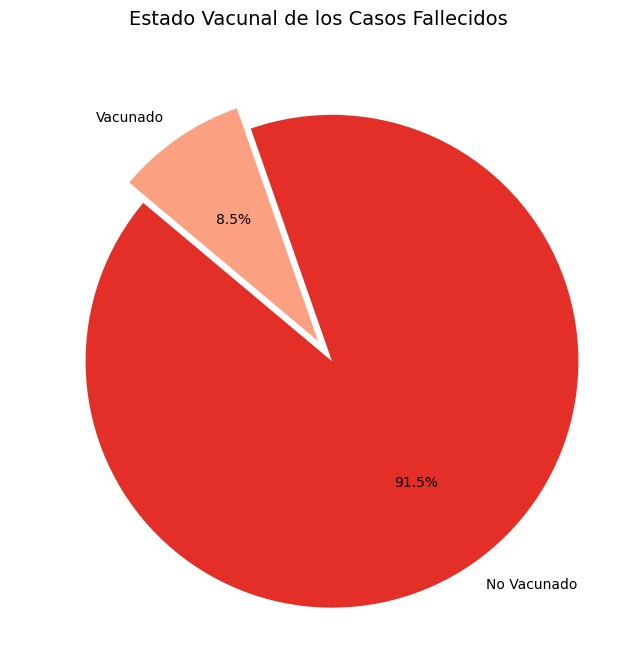

In [31]:
defunciones_vac = df[df['DEFUNCION'] == 1]['VACUNACION_TXT'].value_counts()

if not defunciones_vac.empty:
    plt.figure(figsize=(8, 8))
    
    mi_explode = [0.1 if i == 0 else 0 for i in range(len(defunciones_vac))]
    
    mis_colores = sns.color_palette("Reds_r", n_colors=len(defunciones_vac))

    plt.pie(defunciones_vac, 
            labels=defunciones_vac.index, 
            autopct='%1.1f%%', 
            colors=mis_colores, 
            startangle=140, 
            explode=mi_explode)
    
    plt.title('Estado Vacunal de los Casos Fallecidos', fontsize=14)
    plt.show()
else:
    print("No se encontraron registros de defunciones para este análisis.")

El cruce de datos entre el diagnóstico positivo y el historial vacunal revela conclusiones contundentes sobre la vulnerabilidad de la población:

- Predominio de Población No Inmunizada: De los 109,458 casos, la gran mayoría (86.06%) corresponden a personas sin antecedente de vacunación. Esto posiciona a la falta de inmunización como el factor de riesgo determinante en el brote actual.

- Relación Directa con la Mortalidad: El análisis de los casos fallecidos es alarmante: el 91.5% de las defunciones ocurrieron en personas no vacunadas. Solo un 8.5% contaba con registro de vacuna, lo que subraya la alta eficacia de la inmunización para prevenir formas graves y letales de la enfermedad.

#### Vulnerabilidad por Etapas de Vida:

- En el grupo de <1 año, casi el 100% no está vacunado (lo cual es esperado por el esquema de salud), pero esto los convierte en el grupo más expuesto ante la falta de "inmunidad de rebaño".

- En el grupo de 1-5 años (donde detectamos la mayor mortalidad anteriormente), existe una proporción significativa de niños sin vacuna que ya deberían tener al menos la primera dosis.

- En adultos (19-50 años), la proporción de no vacunados se mantiene alta (cercana al 80%), explicando el segundo pico de contagios detectado en el análisis demográfico.


#### Conclusión del Punto 4

Los datos sugieren que el brote de 2025 no se debió a una falla de la vacuna en sí misma (casos de vacunados que enferman), sino a una acumulación de personas susceptibles que no recibieron la dosis en su momento.

### 5. Distribución Geográfica

En esta sección final, identificamos las regiones de México que concentraron la mayor carga de la enfermedad durante el brote de 2025. Esto es crucial para entender dónde fallaron los cercos epidemiológicos y dónde se requieren campañas de vacunación intensivas.

In [32]:
catálogo_estados = {
    1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche',
    5: 'Coahuila', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México',
    10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco',
    15: 'México', 16: 'Michoacán', 17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León',
    20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí',
    25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas', 29: 'Tlaxcala',
    30: 'Veracruz', 31: 'Yucatán', 32: 'Zacatecas'
}


df['ESTADO_RESIDENCIA'] = df['ENTIDAD_RES'].map(catálogo_estados)

/var/folders/16/rwkptmp92_b7tw7nx11rkvbw0000gn/T/ipykernel_2514/1179895713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.values, y=top_estados.index, palette='flare')


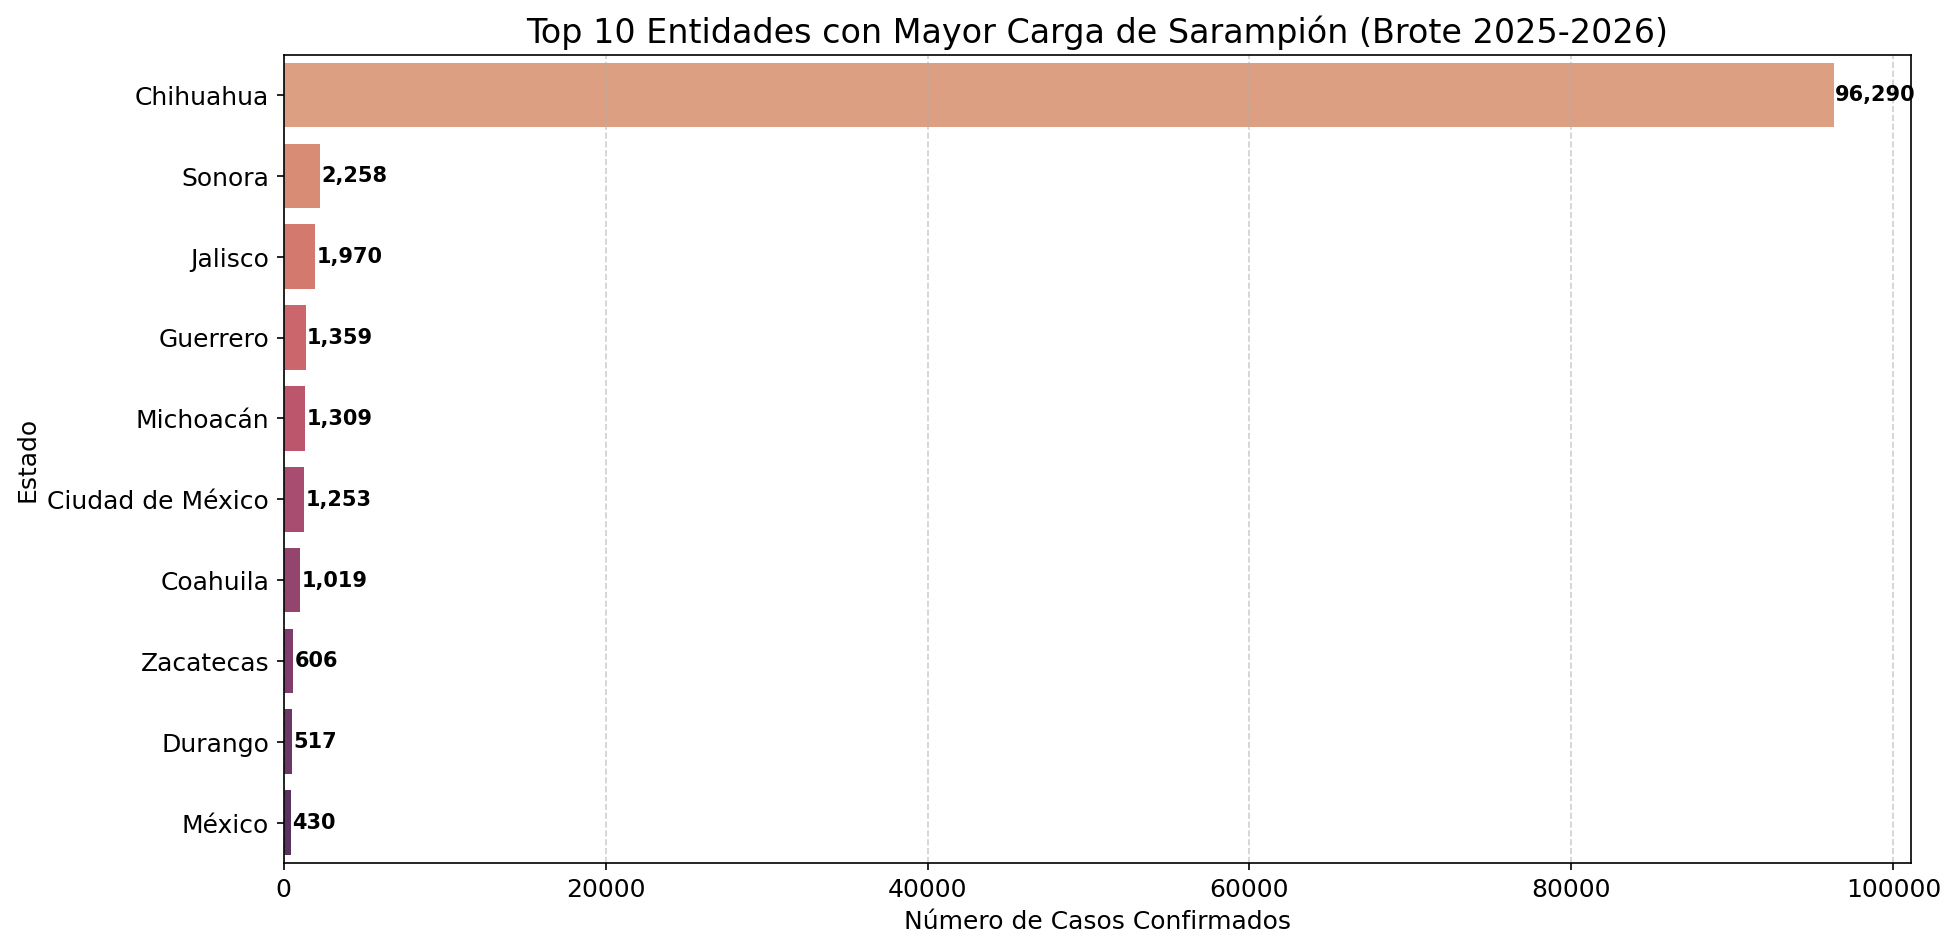

In [39]:
top_estados = df['ESTADO_RESIDENCIA'].value_counts().head(10)

plt.figure(figsize=(14, 7),dpi=150)
sns.barplot(x=top_estados.values, y=top_estados.index, palette='flare')
plt.title('Top 10 Entidades con Mayor Carga de Sarampión (Brote 2025-2026)', fontsize=16)
plt.xlabel('Número de Casos Confirmados', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tick_params(labelsize=12)

for i, v in enumerate(top_estados.values):
    plt.text(v + 100, i, f'{v:,}', va='center', fontweight='bold')

plt.show()

In [36]:
defunciones_estado = df[df['DEFUNCION'] == 1]['ESTADO_RESIDENCIA'].value_counts().head(5)

print("Estados con mayor mortalidad acumulada:")
print(defunciones_estado)

Estados con mayor mortalidad acumulada:
ESTADO_RESIDENCIA
Chihuahua    402
Sonora        27
Jalisco        4
Name: count, dtype: int64


Al mapear los 109,458 casos confirmados, los resultados revelan una disparidad regional crítica que define la naturaleza de este brote:

- Chihuahua como Epicentro: El estado de Chihuahua concentró la gran mayoría de la carga de enfermedad con 96,290 casos, lo que representa más del 85% del total nacional. Esta cifra es drásticamente superior a la de cualquier otra entidad federativa, situando a este estado como el foco principal de la crisis epidemiológica.

- Corredor del Norte y Occidente: Detrás de Chihuahua, los estados con mayor incidencia fueron Sonora (2,258 casos) y Jalisco (1,970 casos). La presencia de Guerrero, Michoacán y la Ciudad de México en el Top 10 indica que, aunque hubo dispersión hacia el centro y sur, la magnitud fue significativamente menor en comparación con el norte.

- Mortalidad Geográfica: La letalidad siguió el mismo patrón de concentración. Chihuahua registró 402 defunciones, seguido por Sonora con 27 y Jalisco con 4. Esto confirma que la crisis de mortalidad estuvo estrechamente ligada a la explosión de casos en la región fronteriza.

### 6. Conclusiones y Recomendaciones Finales



- Falla en la Barrera Inmunológica: El brote se alimentó de una población mayoritariamente no vacunada (86%), afectando de forma letal a niños de 1 a 5 años y de forma masiva a adultos de 25 a 35 años.

- Temporalidad Crítica: La vigilancia detectó un pico exponencial en octubre de 2025, rompiendo años de silencio epidemiológico.

- Focalización Urgente: Chihuahua requiere una intervención inmediata de salud pública, incluyendo campañas de vacunación intensiva y refuerzos para adultos, dado que concentró el 88% de las muertes totales identificadas en este análisis.